# Projeto 2 - Prognóstico

## Apresentação

Esse projeto foi desenvolvido no contexto da discplina de EA098/MO826 - Ciência e Análise de dados em Saúde, ministrada no primeiro semestre de 2022 na Faculdade de Engenharia Elétrica e Computação da UNICAMP.

**Nome**: Matheus Xavier Sampaio	          RA 220092    Curso: Computação

**Nome**: Guilherme Augusto Amorim Terrell  RA 168899	   Curso: Elétrica


## Contextualização da proposta

Analisando um conjunto de variáveis de pacientes que deram entrada em uma unidade de saúde, deseja-se construir um modelo de machine learning capaz de prever se o paciente virá a óbito em até um ano após a última vez que deu entrada. 

Obs: A idéia inicial era fazer o prognóstido se o paciente viria a óbito 30 dias após o encontro, no entanto, a quantidade de encontros que respeitam esta condição é muito pequena. Assim o prognóstico será se o paciente virá a óbito 1 ano após o encontro.

Abaixo temos uma listagem com as variáveis que foram escolhidas para alimentar o modelo de machine learning proposto nesse projeto. Essas variáveis foram selecionadas pois apresentam alguma relação direta com o estado de saúde atual do paciente, e terão relevância caso esse paciente necessite de atendimento médico. Por exemplo, um paciente que possui algum tipo de alergia severa ou que faz uso de medicamento controlado pode ter mais chance de vir a óbito em caso de emergência médica. Um indivíduo que possui plano de saúde pode ter mais chance de sobreviver a uma intervenção médica do que um indivíduo que não possui plano de sáude. 

### Variáveis usadas para prognóstico

- Informações gerais do paciente (`patients.csv`: `birthdate`, `deathdate`, `race`, `ethnicity`, `gender`, `city`, `state`)
- Tipo de entrada (`encounters.csv`: `start`, `stop`, `patient`, `encounterclass`, `code`, `description`)
- Condição de chegada (`conditions.csv`: `start`, `stop`, `patient`, `encounter`, `code`, `description`)
- Tem plano de saúde (`careplans.csv`: `start`, `stop`, `patient`, `encounter`, `code`, `description`)
- Imunização do paciente (`immunizations.csv`: `date`, `patient`, `encounter`, `code`, `description`)
- Gravidade de alergia (`allergies.csv`: `start`, `stop`, `patient`, `encounter`, `category`, `description1`, `severity1`, `description2`, `severity2`)
- Medicamentos tomados (`medications.csv`: `start`, `stop`, `patient`, `encounter`, `code`, `description`)
- Tem disposivo médico implantado (`devices.csv`: `start`, `stop`, `patient`, `encounter`, `code`, `description`)
- Realizou algum procedimento médico (`procedures.csv`: `start`, `stop`, `patient`, `encounter`, `code`, `description`)
- Médidas de observação (`observations.csv`: `date`, `patient`, `encounter`, `code`, `description`, `value`, `units`, `type`)


### Bases adotadas para o estudo


*   scenario01
*   scenario02



## Ferramentas

O projeto foi todo desenvolvido em linguagem de programação Python na plataforma Google Colaboratory.
As principais bibliotecas e módulos do python utilizados nesse projeto foram:



*   Importação e tratamento dos dados:
    *   pandas;
    *   itertools;
    *   numpy;
    
*   Implementação do modelo de machine learning:
    *   sklearn.model_selection;
    *   skleran.preprocessing;
    *   sklearn.tree;

*   Visualização e avaliação dos resultados:
    *   matplotlib;
    *   seaborn;
    *   sklearn.metrics;

## Metodologia
Implementaremos funções que coletem, em cada uma das bases de dados, informações específicas de cada paciente e gere uma coluna para cada resultado preenchida com o valor encontrado ou com "NaN" caso o paciente não tenha aquele registro específico. Dessa forma, teremos ao final um dataframe cujas linhas são um encontro, ou visita do paciente a unidade de saúde, e as colunas são as features, ou informações referentes ao paciente no momento do encontro que alimentaram o modelo de aprendizado de máquina. Nesse projeto o modelo escolhido foi o de árvore de decisão.

A princípio não será rejeitada nenhuma feature, apenas após rodarmos o algorítmo ao menos uma vez analisaremos as variáveis que não tiveram uma relevância mínima na predição e as removeremos.

## Implementação

### Dados brutos
Importação dos dados

In [ ]:
import pandas as pd

In [ ]:
def read_csv(scenario, name, cols, datetime_cols):
    """
    Lê o arquivo do repositório, converte colunas de datas e ordena por data.
    """
    url = f'https://raw.githubusercontent.com/santanche/lab2learn/master/data/synthea/{scenario}/csv/{name}.csv'
    df = pd.read_csv(url)
    df.columns = list(map(str.lower, df.columns))
    for c in datetime_cols:
        df[c] = pd.to_datetime(df[c])
        try:
            df[c] = df[c].dt.tz_localize('UTC')
        except TypeError:
            pass
    df = df.sort_values(by=datetime_cols)
    return df[cols]

In [ ]:
patients = read_csv('scenario01', 'patients', ['id', 'birthdate', 'deathdate', 'race', 'ethnicity', 'gender', 'city', 'state'], ['birthdate', 'deathdate'])
encounters = read_csv('scenario01', 'encounters', ['id', 'start', 'stop', 'patient', 'encounterclass',  'description'], ['start', 'stop'])
conditions = read_csv('scenario01', 'conditions', ['start', 'stop', 'patient', 'description'], ['start', 'stop'])
careplans = read_csv('scenario01', 'careplans', ['start', 'stop', 'patient', 'description'], ['start', 'stop'])
immunizations = read_csv('scenario01', 'immunizations', ['date', 'patient', 'description'], ['date'])
allergies = read_csv('scenario01', 'allergies', ['start', 'stop', 'patient', 'category', 'description1', 'severity1', 'description2', 'severity2'], ['start', 'stop'])
medications = read_csv('scenario01', 'medications', ['start', 'stop', 'patient', 'description'], ['start', 'stop'])
devices = read_csv('scenario01', 'devices', ['start', 'stop', 'patient', 'description'], ['start', 'stop'])
procedures = read_csv('scenario01', 'procedures', ['start', 'stop', 'patient', 'description'], ['start', 'stop'])
observations = read_csv('scenario01', 'observations', ['date',  'patient', 'description', 'value', 'units', 'type'], ['date'])

In [ ]:
patients.head()

,id,birthdate,deathdate,race,ethnicity,gender,city,state
831,c110e3db-0c90-86aa-ebda-8faac1165001,1912-01-09 00:00:00+00:00,1994-11-22 00:00:00+00:00,white,nonhispanic,M,Yarmouth,Massachusetts
778,b3abb5a5-2464-b95c-0816-0ef3e486079d,1912-01-09 00:00:00+00:00,1995-04-11 00:00:00+00:00,white,nonhispanic,M,Yarmouth,Massachusetts
798,b19c828a-b420-3681-8742-1384e1477b1e,1912-01-09 00:00:00+00:00,1996-08-01 00:00:00+00:00,white,nonhispanic,M,Yarmouth,Massachusetts
861,b415e278-76a8-94ca-bb1d-9da709dbeb80,1912-01-09 00:00:00+00:00,NaT,white,nonhispanic,M,Yarmouth,Massachusetts
1102,af6d9b5b-d048-272d-3acf-2737a0a827b1,1913-11-02 00:00:00+00:00,1972-01-24 00:00:00+00:00,white,nonhispanic,M,North Andover,Massachusetts


In [ ]:
encounters.head()

,id,start,stop,patient,encounterclass,description
55253,5b3fb1e3-2fb9-f123-be78-c0f464312d2b,1917-10-15 15:45:50+00:00,1917-10-15 16:00:50+00:00,af6d9b5b-d048-272d-3acf-2737a0a827b1,ambulatory,Encounter for symptom
54180,1a0f4e54-f914-bb93-6a2f-66e5d42aad77,1919-02-12 08:07:32+00:00,1919-02-12 08:22:32+00:00,b21c7fc4-3d2a-e921-e304-7071c9737034,ambulatory,Encounter for symptom
5357,08dd5e03-1cd0-d36c-289f-dfa21df383ce,1919-11-01 10:37:25+00:00,1919-11-01 10:52:25+00:00,b60922aa-a536-e6a8-9e4b-d523d17b6929,wellness,Well child visit (procedure)
5360,75cdd2f0-b727-4866-5841-a0ff3fa82927,1919-12-06 10:37:25+00:00,1919-12-06 10:52:25+00:00,b60922aa-a536-e6a8-9e4b-d523d17b6929,wellness,Well child visit (procedure)
5363,1c989a8c-be61-795a-9bfd-68723da8dafd,1920-01-30 10:37:25+00:00,1920-01-30 10:52:25+00:00,b60922aa-a536-e6a8-9e4b-d523d17b6929,outpatient,Encounter for symptom


In [ ]:
conditions.head()

,start,stop,patient,description
33601,1917-10-15 00:00:00+00:00,NaT,af6d9b5b-d048-272d-3acf-2737a0a827b1,Chronic sinusitis (disorder)
33012,1919-02-12 00:00:00+00:00,NaT,b21c7fc4-3d2a-e921-e304-7071c9737034,Chronic sinusitis (disorder)
3545,1920-01-30 00:00:00+00:00,1920-04-10 00:00:00+00:00,b60922aa-a536-e6a8-9e4b-d523d17b6929,Otitis media
35767,1922-05-16 00:00:00+00:00,NaT,6ad59b65-21fd-9d32-f7b6-29aec5b27d81,Appendicitis
35768,1922-05-16 00:00:00+00:00,NaT,6ad59b65-21fd-9d32-f7b6-29aec5b27d81,History of appendectomy


In [ ]:
allergies.head()

,start,stop,patient,category,description1,severity1,description2,severity2
884,1922-07-04 00:00:00+00:00,NaT,5defca62-3335-1c62-b9d4-f4a4e97d8b17,medication,NaN,NaN,NaN,NaN
538,1934-01-07 00:00:00+00:00,NaT,e701b7aa-3e75-84cc-ccda-98184bf0d59d,environment,NaN,NaN,NaN,NaN
147,1939-06-06 00:00:00+00:00,NaT,0e656d94-c51e-f6ef-69e3-a01051bc9081,medication,Itching (finding),MODERATE,NaN,NaN
419,1940-11-20 00:00:00+00:00,NaT,42eae677-a732-3a5d-fda1-a998297a9795,environment,NaN,NaN,NaN,NaN
420,1940-11-20 00:00:00+00:00,NaT,42eae677-a732-3a5d-fda1-a998297a9795,environment,NaN,NaN,NaN,NaN


In [ ]:
encounters['encounterclass'].value_counts()

wellness      23508
ambulatory    19473
outpatient    10162
urgentcare     2064
emergency      1811
inpatient      1671
home            434
hospice         169
snf             150
virtual          39
Name: encounterclass, dtype: int64

### Filtra encontros e informações de pacientes

Filtra apenas os encontros dos tipos:
- atendimento de urgência
- emergência
- internação

Junta as informações dos pacientes aos encontros

Cria a coluna de idade do paciente no encontro

Verifica se o paciente veio a óbito em até 1 ano após o encontro

In [ ]:
interest_encounters =  encounters[encounters['encounterclass'].isin(['urgentcare', 'emergency', 'inpatient'])]
interest_encounters = interest_encounters.rename(columns={'start': 'start_encounter', 'stop': 'stop_encounter', 'description': 'description_encounter'})

patients['citystate'] = patients['city'] + patients['state']
patients = patients.drop(columns=['city', 'state'])

interest_encounters = interest_encounters.merge(patients, left_on='patient', right_on='id', how='left', suffixes=('_encounter', '_patient'))

interest_encounters['age'] = (interest_encounters['start_encounter'] - interest_encounters['birthdate']).dt.days / 365
interest_encounters['death_before_period'] = (interest_encounters['deathdate'] - interest_encounters['start_encounter']).dt.days < 365

interest_encounters['death_before_period'].value_counts()

False    5084
True      462
Name: death_before_period, dtype: int64

In [ ]:
interest_encounters.head()

,id_encounter,start_encounter,stop_encounter,patient,encounterclass,description_encounter,id_patient,birthdate,deathdate,race,ethnicity,gender,citystate,age,death_before_period
0,54b1fe06-aea9-a2a2-a79e-eb7816925632,1922-05-16 23:44:21+00:00,1922-05-17 00:44:21+00:00,6ad59b65-21fd-9d32-f7b6-29aec5b27d81,emergency,Emergency Room Admission,6ad59b65-21fd-9d32-f7b6-29aec5b27d81,1918-04-15 00:00:00+00:00,2001-12-18 00:00:00+00:00,white,nonhispanic,M,NorthamptonMassachusetts,4.087671,False
1,0a44d040-27c9-b49f-57d2-443e046ab94b,1922-05-16 23:44:21+00:00,1922-05-19 04:44:07+00:00,6ad59b65-21fd-9d32-f7b6-29aec5b27d81,inpatient,Encounter Inpatient,6ad59b65-21fd-9d32-f7b6-29aec5b27d81,1918-04-15 00:00:00+00:00,2001-12-18 00:00:00+00:00,white,nonhispanic,M,NorthamptonMassachusetts,4.087671,False
2,9c163fb1-120b-7d34-31ee-8e8f5bf26a53,1922-06-27 19:18:42+00:00,1922-06-27 21:56:23+00:00,ef19038d-0e3e-70b9-7488-230c30731afc,emergency,Emergency Room Admission,ef19038d-0e3e-70b9-7488-230c30731afc,1918-02-16 00:00:00+00:00,NaT,white,nonhispanic,F,NortonMassachusetts,4.361644,False
3,2e11576d-e96a-8299-91b6-203b357a60f2,1922-12-03 10:37:25+00:00,1922-12-03 11:37:25+00:00,b60922aa-a536-e6a8-9e4b-d523d17b6929,emergency,Emergency room admission (procedure),b60922aa-a536-e6a8-9e4b-d523d17b6929,1919-11-01 00:00:00+00:00,1924-10-30 00:00:00+00:00,white,nonhispanic,F,ChelseaMassachusetts,3.090411,False
4,fbbd7b01-1387-5869-5c12-2fe616a90e03,1924-10-30 10:37:25+00:00,1924-10-31 10:37:25+00:00,b60922aa-a536-e6a8-9e4b-d523d17b6929,inpatient,Encounter for problem (procedure),b60922aa-a536-e6a8-9e4b-d523d17b6929,1919-11-01 00:00:00+00:00,1924-10-30 00:00:00+00:00,white,nonhispanic,F,ChelseaMassachusetts,5.000000,True


### Processa informações do paciente

Para cada característica do paciente, adicionaremos esta como uma coluna na informação do encontro. Esta será adicionada apenas se é referente a algo que aconteceu antes do encontro. A informação mais recente será mantida.

In [ ]:
def join_data_with_encounters(interest_encounters, dataframe, columns):
    """
    Realiza a uniao entre os encontros e algum dataframe com informação sobre o paciente.

    Agrega as difetentes informações em uma lista
    """
    agg = {c: list for c in columns}
    existing_patients = interest_encounters['patient'].unique()
    
    dataframe = dataframe[dataframe['patient'].isin(existing_patients)]
    dataframe = dataframe.groupby('patient').agg(agg)
    dataframe = dataframe.reset_index()

    return interest_encounters.merge(dataframe, on='patient', how='left', suffixes=('_encounter', '_data'))

In [ ]:
encounter_condition = join_data_with_encounters(interest_encounters, conditions, ['description', 'start', 'stop'])

In [ ]:
encounter_condition.head()

,id_encounter,start_encounter,stop_encounter,patient,encounterclass,description_encounter,id_patient,birthdate,deathdate,race,ethnicity,gender,citystate,age,death_before_period,description,start,stop
0,54b1fe06-aea9-a2a2-a79e-eb7816925632,1922-05-16 23:44:21+00:00,1922-05-17 00:44:21+00:00,6ad59b65-21fd-9d32-f7b6-29aec5b27d81,emergency,Emergency Room Admission,6ad59b65-21fd-9d32-f7b6-29aec5b27d81,1918-04-15 00:00:00+00:00,2001-12-18 00:00:00+00:00,white,nonhispanic,M,NorthamptonMassachusetts,4.087671,False,"[Appendicitis, History of appendectomy, Receiv...","[1922-05-16 00:00:00+00:00, 1922-05-16 00:00:0...","[NaT, NaT, NaT, NaT, NaT, NaT, 1992-08-31 00:0..."
1,0a44d040-27c9-b49f-57d2-443e046ab94b,1922-05-16 23:44:21+00:00,1922-05-19 04:44:07+00:00,6ad59b65-21fd-9d32-f7b6-29aec5b27d81,inpatient,Encounter Inpatient,6ad59b65-21fd-9d32-f7b6-29aec5b27d81,1918-04-15 00:00:00+00:00,2001-12-18 00:00:00+00:00,white,nonhispanic,M,NorthamptonMassachusetts,4.087671,False,"[Appendicitis, History of appendectomy, Receiv...","[1922-05-16 00:00:00+00:00, 1922-05-16 00:00:0...","[NaT, NaT, NaT, NaT, NaT, NaT, 1992-08-31 00:0..."
2,9c163fb1-120b-7d34-31ee-8e8f5bf26a53,1922-06-27 19:18:42+00:00,1922-06-27 21:56:23+00:00,ef19038d-0e3e-70b9-7488-230c30731afc,emergency,Emergency Room Admission,ef19038d-0e3e-70b9-7488-230c30731afc,1918-02-16 00:00:00+00:00,NaT,white,nonhispanic,F,NortonMassachusetts,4.361644,False,"[Seizure disorder, History of single seizure (...","[1922-06-27 00:00:00+00:00, 1922-06-27 00:00:0...","[NaT, NaT, NaT, NaT, 1937-04-17 00:00:00+00:00..."
3,2e11576d-e96a-8299-91b6-203b357a60f2,1922-12-03 10:37:25+00:00,1922-12-03 11:37:25+00:00,b60922aa-a536-e6a8-9e4b-d523d17b6929,emergency,Emergency room admission (procedure),b60922aa-a536-e6a8-9e4b-d523d17b6929,1919-11-01 00:00:00+00:00,1924-10-30 00:00:00+00:00,white,nonhispanic,F,ChelseaMassachusetts,3.090411,False,"[Otitis media, Viral sinusitis (disorder), Fra...","[1920-01-30 00:00:00+00:00, 1922-11-20 00:00:0...","[1920-04-10 00:00:00+00:00, 1922-11-30 00:00:0..."
4,fbbd7b01-1387-5869-5c12-2fe616a90e03,1924-10-30 10:37:25+00:00,1924-10-31 10:37:25+00:00,b60922aa-a536-e6a8-9e4b-d523d17b6929,inpatient,Encounter for problem (procedure),b60922aa-a536-e6a8-9e4b-d523d17b6929,1919-11-01 00:00:00+00:00,1924-10-30 00:00:00+00:00,white,nonhispanic,F,ChelseaMassachusetts,5.000000,True,"[Otitis media, Viral sinusitis (disorder), Fra...","[1920-01-30 00:00:00+00:00, 1922-11-20 00:00:0...","[1920-04-10 00:00:00+00:00, 1922-11-30 00:00:0..."


#### Adiciona informações de condição, plano de saúde, medicamentos, procedimentos e aparelhos

In [ ]:
def map_info_base(row, colname):
    """
    Cria um dicionario com os dados do paciente na informação fornecida.

    Percorre as listas de descrição, inicio e fim do estado.
    Se este estado aconteceu antes do encontro, ele é adicionado.
    Tenta manter o dado mais recente.
    """
    data = {}
    latest_dates = {}

    if isinstance(row['description'], list) and isinstance(row['start'], list):
        for desc, start, stop in zip(row['description'], row['start'], row['stop']):
            if start < row['start_encounter']:
                if desc not in latest_dates or latest_dates[desc] < start:
                    data[desc] = (pd.isnull(stop) or (row['start_encounter'] < stop)) + 1
                    latest_dates[desc] = start

    row[colname] = data
    return row

In [ ]:
encounter_condition = encounter_condition.apply(lambda x: map_info_base(x, 'condition'), axis=1)

In [ ]:
encounter_condition[['start_encounter', 'stop_encounter', 'patient', 'description', 'start', 'stop', 'condition']].head()

,start_encounter,stop_encounter,patient,description,start,stop,condition
0,1922-05-16 23:44:21+00:00,1922-05-17 00:44:21+00:00,6ad59b65-21fd-9d32-f7b6-29aec5b27d81,"[Appendicitis, History of appendectomy, Receiv...","[1922-05-16 00:00:00+00:00, 1922-05-16 00:00:0...","[NaT, NaT, NaT, NaT, NaT, NaT, 1992-08-31 00:0...","{'Appendicitis': 2, 'History of appendectomy': 2}"
1,1922-05-16 23:44:21+00:00,1922-05-19 04:44:07+00:00,6ad59b65-21fd-9d32-f7b6-29aec5b27d81,"[Appendicitis, History of appendectomy, Receiv...","[1922-05-16 00:00:00+00:00, 1922-05-16 00:00:0...","[NaT, NaT, NaT, NaT, NaT, NaT, 1992-08-31 00:0...","{'Appendicitis': 2, 'History of appendectomy': 2}"
2,1922-06-27 19:18:42+00:00,1922-06-27 21:56:23+00:00,ef19038d-0e3e-70b9-7488-230c30731afc,"[Seizure disorder, History of single seizure (...","[1922-06-27 00:00:00+00:00, 1922-06-27 00:00:0...","[NaT, NaT, NaT, NaT, 1937-04-17 00:00:00+00:00...","{'Seizure disorder': 2, 'History of single sei..."
3,1922-12-03 10:37:25+00:00,1922-12-03 11:37:25+00:00,b60922aa-a536-e6a8-9e4b-d523d17b6929,"[Otitis media, Viral sinusitis (disorder), Fra...","[1920-01-30 00:00:00+00:00, 1922-11-20 00:00:0...","[1920-04-10 00:00:00+00:00, 1922-11-30 00:00:0...","{'Otitis media': 1, 'Viral sinusitis (disorder..."
4,1924-10-30 10:37:25+00:00,1924-10-31 10:37:25+00:00,b60922aa-a536-e6a8-9e4b-d523d17b6929,"[Otitis media, Viral sinusitis (disorder), Fra...","[1920-01-30 00:00:00+00:00, 1922-11-20 00:00:0...","[1920-04-10 00:00:00+00:00, 1922-11-30 00:00:0...","{'Otitis media': 1, 'Viral sinusitis (disorder..."


Funções auxiliares para transformar os dicionários em colunas independentes.

In [ ]:
from itertools import chain
import numpy as np

def flatten_dict(d, parent_key = '', sep = '_') -> dict:
    if not isinstance(d, dict):
        return {parent_key: d}
    items  = []
    for k, v in d.items():
        new_key = f'{parent_key}{sep}{k}' if parent_key else k
        if isinstance(v, dict):
            items.extend(flatten_dict(v, new_key, sep=sep).items())
        else:
            items.append((new_key, v))
    return dict(items)


def flatten_columns(data, columns):
    data = data.copy()
    if not isinstance(columns, list):
        columns = [columns]
    flattened_columns = {}
    for col in columns:
        data[f'{col}_'] = data[f'{col}'].apply(flatten_dict)
        keys = set(chain(*data[f'{col}_'].apply(lambda column: column.keys())))
        for key in keys:
            column_name = f'{col}_{key}'.lower()
            flattened_columns[column_name] = data[f'{col}_'].apply(
                lambda cell: cell[key] if key in cell.keys() else np.NaN
            )
    data = pd.concat((data, pd.DataFrame(flattened_columns)), axis=1)
    cols_to_drop = [(f'{col}', f'{col}_') for col in columns]
    return data.drop(columns=list(chain(*cols_to_drop)))

In [ ]:
df = encounter_condition.copy()

In [ ]:
encounter_condition = flatten_columns(encounter_condition, 'condition')
encounter_condition = encounter_condition.drop(columns=['description', 'start', 'stop'])

In [ ]:
encounter_condition[~encounter_condition['condition_suspected lung cancer (situation)'].isna()].head()

,id_encounter,start_encounter,stop_encounter,patient,encounterclass,description_encounter,id_patient,birthdate,deathdate,race,...,condition_scoliosis deformity of spine (disorder),condition_septic shock (disorder),condition_metastasis from malignant tumor of prostate (disorder),condition_appendicitis,condition_meningomyelocele (disorder),condition_acute bacterial sinusitis (disorder),condition_malignant tumor of colon,condition_non-small cell carcinoma of lung tnm stage 1 (disorder),condition_spasticity (finding),condition_stroke
211,a18f2317-cf17-d08e-ea7d-402adb595217,1980-08-30 10:44:21+00:00,1980-08-30 11:44:21+00:00,5defca62-3335-1c62-b9d4-f4a4e97d8b17,emergency,Emergency Room Admission,5defca62-3335-1c62-b9d4-f4a4e97d8b17,1918-04-15 00:00:00+00:00,1984-04-24 00:00:00+00:00,white,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
212,f9582633-d851-88ac-c5f8-ef7549e7fd78,1980-09-15 19:01:42+00:00,1980-09-16 19:01:42+00:00,5defca62-3335-1c62-b9d4-f4a4e97d8b17,inpatient,Encounter for problem,5defca62-3335-1c62-b9d4-f4a4e97d8b17,1918-04-15 00:00:00+00:00,1984-04-24 00:00:00+00:00,white,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN
213,ea051930-2c55-ef5a-32d8-f6caf292fa1a,1980-10-14 09:35:42+00:00,1980-10-15 09:35:42+00:00,5defca62-3335-1c62-b9d4-f4a4e97d8b17,inpatient,Encounter for problem,5defca62-3335-1c62-b9d4-f4a4e97d8b17,1918-04-15 00:00:00+00:00,1984-04-24 00:00:00+00:00,white,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN
215,7ace9306-ad4f-32b4-6717-39bee648cf1b,1980-11-11 18:31:42+00:00,1980-11-12 18:31:42+00:00,5defca62-3335-1c62-b9d4-f4a4e97d8b17,inpatient,Encounter for problem,5defca62-3335-1c62-b9d4-f4a4e97d8b17,1918-04-15 00:00:00+00:00,1984-04-24 00:00:00+00:00,white,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN
218,e717246e-8c1f-6a24-6d48-d27f18d93649,1980-12-15 10:13:42+00:00,1980-12-16 10:13:42+00:00,5defca62-3335-1c62-b9d4-f4a4e97d8b17,inpatient,Encounter for problem,5defca62-3335-1c62-b9d4-f4a4e97d8b17,1918-04-15 00:00:00+00:00,1984-04-24 00:00:00+00:00,white,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN


#### Adiciona informação de imunização

In [ ]:
def map_info_immunization(row, colname):
    """
    Cria um dicionario com os dados do paciente na informação de imunização.

    Percorre as listas de descrição, inicio do estado.
    Se este estado aconteceu antes do encontro, ele é adicionado.
    Tenta manter o dado mais recente.
    """
    data = {}
    latest_dates = {}

    if isinstance(row['description'], list) and isinstance(row['date'], list):
        for desc, date in zip(row['description'], row['date']):
            if desc not in latest_dates or latest_dates[desc] < date:
                if date < row['start_encounter']:
                    data[desc] = 1
                    latest_dates[desc] = date

    row[colname] = data
    return row

In [ ]:
immunization_encounters = join_data_with_encounters(interest_encounters, immunizations, ['description', 'date'])
immunization_encounters = immunization_encounters.apply(lambda x: map_info_immunization(x, 'immunization'), axis=1)

In [ ]:
immunization_encounters[['start_encounter', 'stop_encounter', 'patient', 'description', 'date', 'immunization']].head()

,start_encounter,stop_encounter,patient,description,date,immunization
0,1922-05-16 23:44:21+00:00,1922-05-17 00:44:21+00:00,6ad59b65-21fd-9d32-f7b6-29aec5b27d81,[Influenza seasonal injectable preservative...,"[1992-08-31 10:44:21+00:00, 1992-08-31 10:44:2...",{}
1,1922-05-16 23:44:21+00:00,1922-05-19 04:44:07+00:00,6ad59b65-21fd-9d32-f7b6-29aec5b27d81,[Influenza seasonal injectable preservative...,"[1992-08-31 10:44:21+00:00, 1992-08-31 10:44:2...",{}
2,1922-06-27 19:18:42+00:00,1922-06-27 21:56:23+00:00,ef19038d-0e3e-70b9-7488-230c30731afc,[Influenza seasonal injectable preservative...,"[2012-10-27 19:18:42+00:00, 2013-11-02 19:18:4...",{}
3,1922-12-03 10:37:25+00:00,1922-12-03 11:37:25+00:00,b60922aa-a536-e6a8-9e4b-d523d17b6929,NaN,NaN,{}
4,1924-10-30 10:37:25+00:00,1924-10-31 10:37:25+00:00,b60922aa-a536-e6a8-9e4b-d523d17b6929,NaN,NaN,{}


In [ ]:
immunization_encounters = flatten_columns(immunization_encounters, 'immunization')
immunization_encounters = immunization_encounters.drop(columns=['description', 'date'])

In [ ]:
immunization_encounters[~immunization_encounters['immunization_tdap'].isna()].head()

,id_encounter,start_encounter,stop_encounter,patient,encounterclass,description_encounter,id_patient,birthdate,deathdate,race,...,immunization_hpv quadrivalent,immunization_sars-cov-2 (covid-19) vaccine mrna spike protein lnp preservative free 100 mcg/0.5ml dose,immunization_sars-cov-2 (covid-19) vaccine vector non-replicating recombinant spike protein-ad26 preservative free 0.5 ml,immunization_meningococcal mcv4p,immunization_zoster,immunization_rotavirus monovalent,immunization_pneumococcal conjugate pcv 13,immunization_hep b adult,immunization_influenza seasonal injectable preservative free,immunization_sars-cov-2 (covid-19) vaccine mrna spike protein lnp preservative free 30 mcg/0.3ml dose
1655,36504f2f-75de-77dd-d15d-7edbba4e0b67,2005-07-08 11:17:58+00:00,2005-07-09 11:17:58+00:00,dd902384-4955-83d4-4b52-7909f0f91e51,inpatient,Encounter for problem (procedure),dd902384-4955-83d4-4b52-7909f0f91e51,1992-07-11 00:00:00+00:00,2005-07-08 00:00:00+00:00,white,...,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,NaN
2138,651df04c-dab5-7b0c-718e-aa0b0686de9e,2012-10-26 15:00:15+00:00,2012-10-26 16:00:15+00:00,13877085-e4f3-55d7-d7ee-89d6b5f3b5a3,emergency,Emergency hospital admission for asthma,13877085-e4f3-55d7-d7ee-89d6b5f3b5a3,2001-06-29 00:00:00+00:00,NaT,white,...,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,NaN
2194,78a30dc2-bcd4-af70-d88f-57d7f6e9256e,2012-12-31 08:53:21+00:00,2012-12-31 09:53:21+00:00,64179ae3-f6dd-e0e5-e916-6115dffa113e,emergency,Emergency room admission (procedure),64179ae3-f6dd-e0e5-e916-6115dffa113e,2001-05-18 00:00:00+00:00,NaT,white,...,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,NaN
2247,266da4f0-7953-610a-4f1f-3504cb3d70dc,2013-02-15 15:00:15+00:00,2013-02-15 15:15:15+00:00,13877085-e4f3-55d7-d7ee-89d6b5f3b5a3,urgentcare,Urgent care clinic (procedure),13877085-e4f3-55d7-d7ee-89d6b5f3b5a3,2001-06-29 00:00:00+00:00,NaT,white,...,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,NaN
2256,68fcc5c2-9b0e-18bb-39c7-52da46bb1293,2013-02-22 15:00:15+00:00,2013-02-22 15:15:15+00:00,13877085-e4f3-55d7-d7ee-89d6b5f3b5a3,urgentcare,Urgent care clinic (procedure),13877085-e4f3-55d7-d7ee-89d6b5f3b5a3,2001-06-29 00:00:00+00:00,NaT,white,...,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,NaN


#### Adiciona informação de alergias

In [ ]:
def map_data_allergies(row, colname):
    """
    Cria um dicionario com os dados do paciente na informação de alergias.

    Percorre as listas de descrição, inicio e fim do estado.
    Se este estado aconteceu antes do encontro, ele é adicionado.
    Tenta manter o dado mais recente.
    """
    data = {}

    if isinstance(row['category'], list):
        for cat, desc1, sev1, desc2, sev2, start, stop in zip(row['category'], row['description1'], row['severity1'], row['description2'], row['severity2'], row['start'], row['stop']):
            if start < row['start_encounter']:
                data[cat] = {
                    desc1: sev1 if (pd.isnull(stop) or (row['start_encounter'] < stop)) else 'PAST_ALLERGY',
                    desc2: sev2 if (pd.isnull(stop) or (row['start_encounter'] < stop)) else 'PAST_ALLERGY'
                }

    row[colname] = data
    return row

In [ ]:
cols = ['start', 'stop', 'category', 'description1', 'severity1', 'description2', 'severity2']
allergies_encounters = join_data_with_encounters(interest_encounters, allergies, cols)
allergies_encounters = allergies_encounters.apply(lambda x: map_data_allergies(x, 'allergies'), axis=1)

In [ ]:
allergies_encounters[['start_encounter', 'stop_encounter', 'patient', 'start', 'stop', 'category', 'description1', 'severity1', 'description2', 'severity2', 'allergies']].tail()

,start_encounter,stop_encounter,patient,start,stop,category,description1,severity1,description2,severity2,allergies
5541,2022-04-14 10:03:35+00:00,2022-04-14 11:03:35+00:00,11c85df9-4085-afce-75ba-3e62f0c77609,[2019-08-18 00:00:00+00:00],[NaT],[medication],[nan],[nan],[nan],[nan],{'medication': {nan: nan}}
5542,2022-04-15 12:36:24+00:00,2022-04-15 12:51:24+00:00,ff34b909-0ce6-1d5e-6b6d-9b96c75f08bb,"[1960-03-24 00:00:00+00:00, 1960-03-24 00:00:0...","[NaT, NaT]","[medication, food]","[Abdominal pain (finding), Nausea (finding)]","[MODERATE, MODERATE]","[nan, Allergic angioedema (disorder)]","[nan, MODERATE]",{'medication': {'Abdominal pain (finding)': 'M...
5543,2022-04-16 10:46:21+00:00,2022-04-16 11:01:21+00:00,57769960-9411-4af6-42c8-a53d566aa235,NaN,NaN,NaN,NaN,NaN,NaN,NaN,{}
5544,2022-04-22 05:28:46+00:00,2022-04-22 05:43:46+00:00,ea3c8180-450a-de48-559b-9d753d346507,NaN,NaN,NaN,NaN,NaN,NaN,NaN,{}
5545,2022-04-24 09:02:28+00:00,2022-04-24 09:17:28+00:00,ede4104e-a78a-9afc-127f-e2975e4035f5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,{}


In [ ]:
allergies_encounters = flatten_columns(allergies_encounters, 'allergies')
allergies_encounters = allergies_encounters.drop(columns=cols)

In [ ]:
allergies_encounters[~allergies_encounters['allergies_medication_itching (finding)'].isna()].head()

,id_encounter,start_encounter,stop_encounter,patient,encounterclass,description_encounter,id_patient,birthdate,deathdate,race,...,allergies_food_nausea (finding),allergies_food_dyspnea (finding),allergies_medication_itching (finding),allergies_food_wheal (finding),allergies_medication_allergic angioedema (disorder),allergies_environment_sneezing,allergies_food_anaphylaxis (disorder),allergies_food_diarrhea (finding),allergies_food_eruption of skin (disorder),allergies_food_wheezing (finding)
471,4af7eea3-a711-0c24-dca5-e5e9bb467f6a,1988-09-19 22:39:33+00:00,1988-09-20 22:39:33+00:00,0e656d94-c51e-f6ef-69e3-a01051bc9081,inpatient,Screening surveillance (regime/therapy),0e656d94-c51e-f6ef-69e3-a01051bc9081,1919-11-01 00:00:00+00:00,1998-08-29 00:00:00+00:00,white,...,NaN,NaN,MODERATE,NaN,NaN,NaN,NaN,NaN,NaN,NaN
472,3d2273cf-84d5-21ca-fa92-7eb157ef644a,1988-09-19 22:57:12+00:00,1988-09-20 22:57:12+00:00,0e656d94-c51e-f6ef-69e3-a01051bc9081,inpatient,Gynecology service (qualifier value),0e656d94-c51e-f6ef-69e3-a01051bc9081,1919-11-01 00:00:00+00:00,1998-08-29 00:00:00+00:00,white,...,NaN,NaN,MODERATE,NaN,NaN,NaN,NaN,NaN,NaN,NaN
534,8fbca6b5-008e-7f0c-c65d-7939011c1231,1989-08-20 23:23:39+00:00,1989-08-21 23:23:39+00:00,0e656d94-c51e-f6ef-69e3-a01051bc9081,inpatient,Screening surveillance (regime/therapy),0e656d94-c51e-f6ef-69e3-a01051bc9081,1919-11-01 00:00:00+00:00,1998-08-29 00:00:00+00:00,white,...,NaN,NaN,MODERATE,NaN,NaN,NaN,NaN,NaN,NaN,NaN
535,ab84808f-48b4-f1f8-2be2-9703f141df69,1989-08-20 23:44:47+00:00,1989-08-21 23:44:47+00:00,0e656d94-c51e-f6ef-69e3-a01051bc9081,inpatient,Gynecology service (qualifier value),0e656d94-c51e-f6ef-69e3-a01051bc9081,1919-11-01 00:00:00+00:00,1998-08-29 00:00:00+00:00,white,...,NaN,NaN,MODERATE,NaN,NaN,NaN,NaN,NaN,NaN,NaN
638,4898b58b-d20d-6a69-fe8e-da96243d92c5,1990-07-25 00:08:12+00:00,1990-07-26 00:08:12+00:00,0e656d94-c51e-f6ef-69e3-a01051bc9081,inpatient,Screening surveillance (regime/therapy),0e656d94-c51e-f6ef-69e3-a01051bc9081,1919-11-01 00:00:00+00:00,1998-08-29 00:00:00+00:00,white,...,NaN,NaN,MODERATE,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Adiciona informação de medidas de observações

In [ ]:
def map_data_observation(row, colname):
    """
    Cria um dicionario com os dados do paciente na informação de observacao.

    Percorre as listas de descrição, inicio do estado.
    Se este estado aconteceu antes do encontro, ele é adicionado.
    Tenta manter o dado mais recente.
    """
    data = {}
    latest_dates = {}

    if isinstance(row['description'], list) and isinstance(row['date'], list):
        for desc, date, value in zip(row['description'], row['date'], row['value']):
            if date < row['start_encounter']:
                if desc not in latest_dates or latest_dates[desc] < date:
                    data[desc] = value
                    latest_dates[desc] = date

    row[colname] = data
    return row

In [ ]:
cols = ['date', 'description', 'value', 'units', 'type']
encounter_observations = join_data_with_encounters(interest_encounters, observations, cols)
encounter_observations = encounter_observations.apply(lambda x: map_data_observation(x, 'observations'), axis=1)

In [ ]:
encounter_observations[['start_encounter', 'stop_encounter', 'patient', 'date', 'description', 'value', 'units', 'type']].head()

,start_encounter,stop_encounter,patient,date,description,value,units,type
0,1922-05-16 23:44:21+00:00,1922-05-17 00:44:21+00:00,6ad59b65-21fd-9d32-f7b6-29aec5b27d81,"[1992-08-31 10:44:21+00:00, 1992-08-31 10:44:2...","[Low Density Lipoprotein Cholesterol, Respirat...","[98.0, 15.0, 1.0, 177.4, 86.0, 105.0, 80.0, 30...","[mg/dL, /min, {score}, cm, /min, mm[Hg], mm[Hg...","[numeric, numeric, numeric, numeric, numeric, ..."
1,1922-05-16 23:44:21+00:00,1922-05-19 04:44:07+00:00,6ad59b65-21fd-9d32-f7b6-29aec5b27d81,"[1992-08-31 10:44:21+00:00, 1992-08-31 10:44:2...","[Low Density Lipoprotein Cholesterol, Respirat...","[98.0, 15.0, 1.0, 177.4, 86.0, 105.0, 80.0, 30...","[mg/dL, /min, {score}, cm, /min, mm[Hg], mm[Hg...","[numeric, numeric, numeric, numeric, numeric, ..."
2,1922-06-27 19:18:42+00:00,1922-06-27 21:56:23+00:00,ef19038d-0e3e-70b9-7488-230c30731afc,"[2012-02-16 18:18:42+00:00, 2012-02-16 18:18:4...","[QALY, DALY, QOLS, Hemoglobin A1c/Hemoglobin.t...","[39.3, 53.7, 0.7, 6.4, Never smoker, 173.9, 0....","[a, a, {score}, %, nan, cm, {score}, kg, kg/m2...","[numeric, numeric, numeric, numeric, text, num..."
3,1922-12-03 10:37:25+00:00,1922-12-03 11:37:25+00:00,b60922aa-a536-e6a8-9e4b-d523d17b6929,"[1919-11-01 10:37:25+00:00, 1919-11-01 10:37:2...","[Tobacco smoking status NHIS, Body Height, Pai...","[Never smoker, 48.9, 3.0, 3.3, 54.5, 32.8, 86....","[nan, cm, {score}, kg, %, cm, mm[Hg], mm[Hg], ...","[text, numeric, numeric, numeric, numeric, num..."
4,1924-10-30 10:37:25+00:00,1924-10-31 10:37:25+00:00,b60922aa-a536-e6a8-9e4b-d523d17b6929,"[1919-11-01 10:37:25+00:00, 1919-11-01 10:37:2...","[Tobacco smoking status NHIS, Body Height, Pai...","[Never smoker, 48.9, 3.0, 3.3, 54.5, 32.8, 86....","[nan, cm, {score}, kg, %, cm, mm[Hg], mm[Hg], ...","[text, numeric, numeric, numeric, numeric, num..."


In [ ]:
encounter_observations = flatten_columns(encounter_observations, 'observations')
encounter_observations = encounter_observations.drop(columns=cols)

In [ ]:
encounter_observations.head()

,id_encounter,start_encounter,stop_encounter,patient,encounterclass,description_encounter,id_patient,birthdate,deathdate,race,...,observations_urea nitrogen [mass/volume] in serum or plasma,observations_what number best describes how during the past week pain has interfered with your general activity?,observations_heart rate,observations_iron binding capacity [mass/volume] in serum or plasma,observations_pain severity - reported,observations_prostate specific ag [mass/volume] in serum or plasma,observations_eosinophils [#/volume] in blood by automated count,observations_carbon dioxide,observations_protein [presence] in urine by test strip,observations_glucose [mass/volume] in serum or plasma
0,54b1fe06-aea9-a2a2-a79e-eb7816925632,1922-05-16 23:44:21+00:00,1922-05-17 00:44:21+00:00,6ad59b65-21fd-9d32-f7b6-29aec5b27d81,emergency,Emergency Room Admission,6ad59b65-21fd-9d32-f7b6-29aec5b27d81,1918-04-15 00:00:00+00:00,2001-12-18 00:00:00+00:00,white,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0a44d040-27c9-b49f-57d2-443e046ab94b,1922-05-16 23:44:21+00:00,1922-05-19 04:44:07+00:00,6ad59b65-21fd-9d32-f7b6-29aec5b27d81,inpatient,Encounter Inpatient,6ad59b65-21fd-9d32-f7b6-29aec5b27d81,1918-04-15 00:00:00+00:00,2001-12-18 00:00:00+00:00,white,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,9c163fb1-120b-7d34-31ee-8e8f5bf26a53,1922-06-27 19:18:42+00:00,1922-06-27 21:56:23+00:00,ef19038d-0e3e-70b9-7488-230c30731afc,emergency,Emergency Room Admission,ef19038d-0e3e-70b9-7488-230c30731afc,1918-02-16 00:00:00+00:00,NaT,white,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2e11576d-e96a-8299-91b6-203b357a60f2,1922-12-03 10:37:25+00:00,1922-12-03 11:37:25+00:00,b60922aa-a536-e6a8-9e4b-d523d17b6929,emergency,Emergency room admission (procedure),b60922aa-a536-e6a8-9e4b-d523d17b6929,1919-11-01 00:00:00+00:00,1924-10-30 00:00:00+00:00,white,...,NaN,NaN,70.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,fbbd7b01-1387-5869-5c12-2fe616a90e03,1924-10-30 10:37:25+00:00,1924-10-31 10:37:25+00:00,b60922aa-a536-e6a8-9e4b-d523d17b6929,inpatient,Encounter for problem (procedure),b60922aa-a536-e6a8-9e4b-d523d17b6929,1919-11-01 00:00:00+00:00,1924-10-30 00:00:00+00:00,white,...,NaN,NaN,66.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Adiciona todas as informações do paciente no momento do encontro

In [ ]:
def process_base_info(encounter_patients, info_data, name):
    """
    Extrai todas as informações para o encontro.
    """
    encounter_patients = join_data_with_encounters(encounter_patients, info_data, ['description', 'start', 'stop'])
    encounter_patients = encounter_patients.apply(lambda x: map_info_base(x, name), axis=1)
    encounter_patients = flatten_columns(encounter_patients, name)
    encounter_patients = encounter_patients.drop(columns=['description', 'start', 'stop'])
    return encounter_patients

Cria um dataframe extraindo todas as informações das variaveis usadas para o prognóstico.

In [ ]:
def create_encounter_info(scenario):
    patients = read_csv(scenario, 'patients', ['id', 'birthdate', 'deathdate', 'race', 'ethnicity', 'gender', 'city', 'state'], ['birthdate', 'deathdate'])
    encounters = read_csv(scenario, 'encounters', ['id', 'start', 'stop', 'patient', 'encounterclass',  'description'], ['start', 'stop'])
    conditions = read_csv(scenario, 'conditions', ['start', 'stop', 'patient', 'description'], ['start', 'stop'])
    careplans = read_csv(scenario, 'careplans', ['start', 'stop', 'patient', 'description'], ['start', 'stop'])
    immunizations = read_csv(scenario, 'immunizations', ['date', 'patient', 'description'], ['date'])
    allergies = read_csv(scenario, 'allergies', ['start', 'stop', 'patient', 'category', 'description1', 'severity1', 'description2', 'severity2'], ['start', 'stop'])
    medications = read_csv(scenario, 'medications', ['start', 'stop', 'patient', 'description'], ['start', 'stop'])
    devices = read_csv(scenario, 'devices', ['start', 'stop', 'patient', 'description'], ['start', 'stop'])
    procedures = read_csv(scenario, 'procedures', ['start', 'stop', 'patient', 'description'], ['start', 'stop'])
    observations = read_csv(scenario, 'observations', ['date',  'patient', 'description', 'value', 'units', 'type'], ['date'])

    interest_encounters =  encounters[encounters['encounterclass'].isin(['urgentcare', 'emergency', 'inpatient'])]
    interest_encounters = interest_encounters.rename(columns={'start': 'start_encounter', 'stop': 'stop_encounter', 'description': 'description_encounter'})

    interest_encounters = interest_encounters.merge(patients, left_on='patient', right_on='id', how='left', suffixes=('_encounter', '_patient'))
    interest_encounters['age'] = (interest_encounters['start_encounter'] - interest_encounters['birthdate']).dt.days / 365
    interest_encounters['death_before_period'] = (interest_encounters['deathdate'] - interest_encounters['start_encounter']).dt.days < 365

    encounter_patients = process_base_info(interest_encounters, conditions, 'conditions')
    encounter_patients = process_base_info(encounter_patients, careplans, 'careplans')
    encounter_patients = process_base_info(encounter_patients, medications, 'medications')
    encounter_patients = process_base_info(encounter_patients, devices, 'devices')
    encounter_patients = process_base_info(encounter_patients, procedures, 'procedures')

    encounter_patients = join_data_with_encounters(encounter_patients, immunizations, ['description', 'date'])
    encounter_patients = encounter_patients.apply(lambda x: map_info_immunization(x, 'immunization'), axis=1)
    encounter_patients = flatten_columns(encounter_patients, 'immunization')
    encounter_patients = encounter_patients.drop(columns=['description', 'date'])

    cols = ['start', 'stop', 'category', 'description1', 'severity1', 'description2', 'severity2']
    encounter_patients = join_data_with_encounters(encounter_patients, allergies, cols)
    encounter_patients = encounter_patients.apply(lambda x: map_data_allergies(x, 'allergies'), axis=1)
    encounter_patients = flatten_columns(encounter_patients, 'allergies')
    encounter_patients = encounter_patients.drop(columns=cols)

    cols = ['date', 'description', 'value', 'units', 'type']
    encounter_patients = join_data_with_encounters(encounter_patients, observations, cols)
    encounter_patients = encounter_patients.apply(lambda x: map_data_observation(x, 'observations'), axis=1)
    encounter_patients = flatten_columns(encounter_patients, 'observations')
    encounter_patients = encounter_patients.drop(columns=cols)

    encounter_patients = encounter_patients.drop(columns=['start_encounter', 'stop_encounter', 'id_encounter', 'patient', 'id_patient', 'birthdate', 'deathdate'])

    return encounter_patients

In [ ]:
encounter_patients_1 = create_encounter_info('scenario01')
encounter_patients_2 = create_encounter_info('scenario02')

In [ ]:
encounter_patients_1['scenario'] = 1
encounter_patients_2['scenario'] = 2

In [ ]:
encounter_patients = encounter_patients_1.append(encounter_patients_2).reset_index(drop=True)

In [ ]:
encounter_patients

,encounterclass,description_encounter,race,ethnicity,gender,city,state,age,death_before_period,conditions_fracture of rib,...,procedures_transplant of lung (procedure),procedures_teleradiotherapy procedure (procedure),procedures_radiation therapy care (regime/therapy),procedures_admission to neurosurgical department,procedures_review of medication (procedure),procedures_oromotor exercises,procedures_injection of botulinum toxin (procedure),procedures_mouth care (regime/therapy),allergies_medication_cough (finding),allergies_environment_wheezing
0,emergency,Emergency Room Admission,white,nonhispanic,M,Northampton,Massachusetts,4.087671,False,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,inpatient,Encounter Inpatient,white,nonhispanic,M,Northampton,Massachusetts,4.087671,False,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,emergency,Emergency Room Admission,white,nonhispanic,F,Norton,Massachusetts,4.361644,False,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,emergency,Emergency room admission (procedure),white,nonhispanic,F,Chelsea,Massachusetts,3.090411,False,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,inpatient,Encounter for problem (procedure),white,nonhispanic,F,Chelsea,Massachusetts,5.000000,True,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11159,inpatient,Encounter for problem (procedure),white,nonhispanic,M,Juneau,Alaska,7.000000,False,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11160,emergency,Emergency Encounter,native,nonhispanic,M,Juneau,Alaska,66.087671,False,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11161,urgentcare,Urgent care clinic (procedure),native,nonhispanic,M,Juneau,Alaska,73.758904,False,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11162,urgentcare,Urgent care clinic (procedure),asian,hispanic,M,Juneau,Alaska,66.375342,False,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Removeremos as colunas com informações demográficas

In [ ]:
encounter_patients = encounter_patients.drop(columns=['race', 'ethnicity', 'gender', 'city', 'state'])

### Transforma dados para o algoritmo de predição

Para o treinamento e teste do modelo, utilizaremos os dados dos dois cenários, com metade usada para treino e metade para teste.

A divisão respeitará a distribuição da variável objetivo a ser predita, a fim de balancear os conjuntos de treino e teste.

In [ ]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(encounter_patients, test_size=0.5, stratify=encounter_patients['death_before_period'], random_state=42)

In [ ]:
train['death_before_period'].value_counts()

False    5225
True      357
Name: death_before_period, dtype: int64

In [ ]:
train['scenario'].value_counts()

1    2832
2    2750
Name: scenario, dtype: int64

In [ ]:
test['death_before_period'].value_counts()

False    5225
True      357
Name: death_before_period, dtype: int64

In [ ]:
test['scenario'].value_counts()

2    2868
1    2714
Name: scenario, dtype: int64

Transforma as informações em texto para numéricas, preenche valores vazios, e converte coluna de óbito em 1 ano para inteiro.

In [ ]:
from sklearn.preprocessing import OrdinalEncoder

str_columns = train.select_dtypes(include=object).columns
encoder = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=np.nan)

train[str_columns] = encoder.fit_transform(train[str_columns]) + 1
train = train.fillna(0)
train['death_before_period'] = train['death_before_period'].astype(int)

test[str_columns] = encoder.transform(test[str_columns]) + 1
test = test.fillna(0)
test['death_before_period'] = test['death_before_period'].astype(int)

In [ ]:
train.head()

,encounterclass,description_encounter,age,death_before_period,conditions_fracture of rib,conditions_misuses drugs (finding),conditions_diabetic retinopathy associated with type ii diabetes mellitus (disorder),conditions_acute respiratory distress syndrome (disorder),conditions_sepsis (disorder),conditions_atopic dermatitis,...,procedures_transplant of lung (procedure),procedures_teleradiotherapy procedure (procedure),procedures_radiation therapy care (regime/therapy),procedures_admission to neurosurgical department,procedures_review of medication (procedure),procedures_oromotor exercises,procedures_injection of botulinum toxin (procedure),procedures_mouth care (regime/therapy),allergies_medication_cough (finding),allergies_environment_wheezing
746,1.0,7.0,73.356164,0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8801,1.0,8.0,98.673973,0,0.0,0.0,2.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2515,1.0,10.0,10.989041,0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9063,3.0,30.0,89.887671,0,0.0,0.0,2.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4780,3.0,30.0,51.032877,0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Treina e avalia o algoritmo de classificação.

In [ ]:
x_train, x_test = train.drop(columns=['death_before_period', 'scenario']), test.drop(columns=['death_before_period', 'scenario'])
y_train, y_test = train['death_before_period'], test['death_before_period']
scenario_train, scenario_test = train['scenario'], test['scenario']

Como algoritmo para classificação, escolhemos a `Arvore de Decisão`.

Este modelo foi escolhido pois arvores de decisão não são lineares, e não podemos assumir que este é um problema linear. Arvores de decisão também lidam melhor com features categóricas do que um algorítmo linear como a Regressão Logística. As Arvores de Decisão apresentam algumas características que ajudam no entendimento dos seus resultdos, como a importância de cada coluna e um diagrama representando o fluxo de decisões.

In [ ]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(random_state=42)

clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)

A análise do modelo será feita com as métricas de classificação `Precisão`, `Revocação`, `F1-score` e visualizando a `Matriz de Confusão`.

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc


def pĺot_confusion_matrix(y_true, y_predictec):
    cm = confusion_matrix(y_true, y_predictec)
    cm = cm / cm.sum(axis=1).reshape(-1, 1)

    plt.figure(figsize=(16, 10))
    sns.heatmap(cm, yticklabels=labels, xticklabels=labels, annot=True, fmt='.3f', cmap='Blues', vmin=0, vmax=1)
    plt.tight_layout()
    plt.show()

def plot_roc_curve(y_true, y_proba):
    plt.figure(figsize=(16, 10))
    lw = 2
    plt.plot([0, 1], [0, 1], color="red", lw=lw, linestyle="--")

    fpr_0, tpr_0, _ = roc_curve(y_true, y_proba[:, 0], pos_label=0)
    auc_0 = auc(fpr_0, tpr_0)
    plt.plot(
        fpr_0,
        tpr_0,
        # color="darkorange",
        lw=lw,
        label=f"Curva ROC Sobrevive (area = {auc_0:0.2f})" ,
    )

    fpr_1, tpr_1, thresholds = roc_curve(y_true, y_proba[:, 1], pos_label=1)
    auc_1 = auc(fpr_1, tpr_1)
    plt.plot(
        fpr_1,
        tpr_1,
        # color="darkorange",
        lw=lw,
        label=f"Curva ROC Não Sobrevive (area = {auc_1:0.2f})",
    )

    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel("Taxa Falso Positivos")
    plt.ylabel("Taxa Verdadeiros Positivos")
    plt.legend(loc="lower right")
    plt.show()

                            precision    recall  f1-score   support

      Sobrevive após 1 ano       0.98      0.98      0.98      5225
Vem a óbito antes de 1 ano       0.70      0.77      0.73       357

                  accuracy                           0.96      5582
                 macro avg       0.84      0.87      0.86      5582
              weighted avg       0.97      0.96      0.96      5582



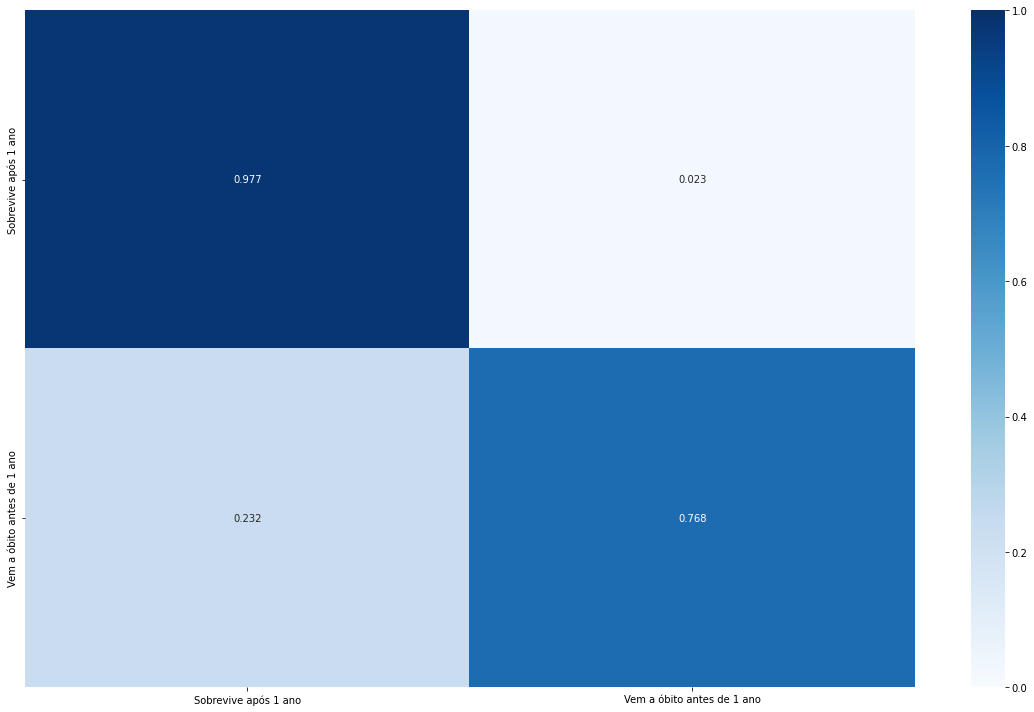

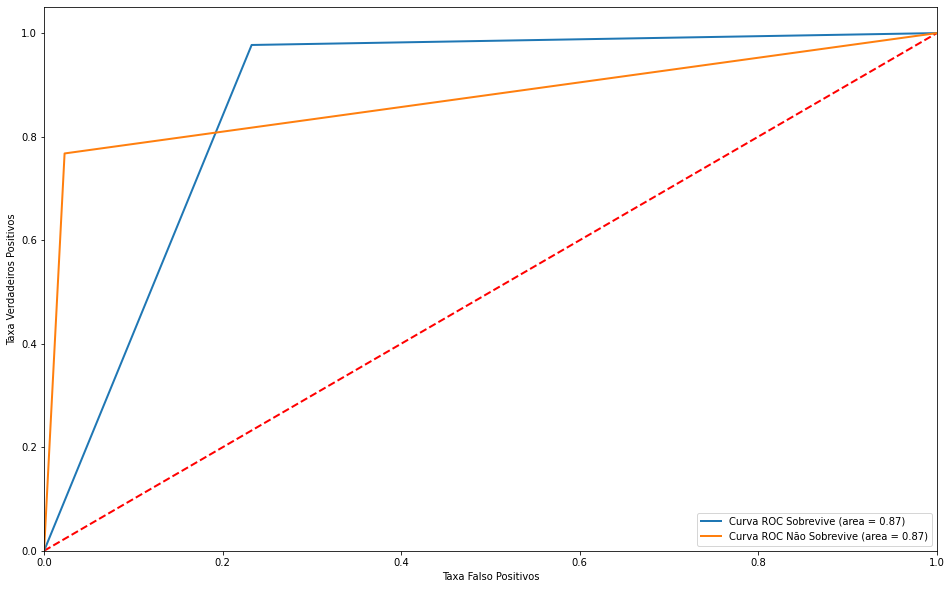

In [ ]:
labels = ['Sobrevive após 1 ano', 'Vem a óbito antes de 1 ano']
print(classification_report(y_test, y_pred, target_names=labels))

pĺot_confusion_matrix(y_test, y_pred)
plot_roc_curve(y_test, clf.predict_proba(x_test))

In [ ]:
y_pred_1 = clf.predict(x_test[scenario_test == 1])
y_pred_2 = clf.predict(x_test[scenario_test == 2])

print('Scenario 01')
print(classification_report(y_test[scenario_test == 1], y_pred_1, target_names=labels))
print('=' * 75)
print('Scenario 02')
print(classification_report(y_test[scenario_test == 2], y_pred_2, target_names=labels))

Scenario 01
                            precision    recall  f1-score   support

      Sobrevive após 1 ano       0.98      0.97      0.98      2482
Vem a óbito antes de 1 ano       0.72      0.79      0.75       232

                  accuracy                           0.96      2714
                 macro avg       0.85      0.88      0.86      2714
              weighted avg       0.96      0.96      0.96      2714

Scenario 02
                            precision    recall  f1-score   support

      Sobrevive após 1 ano       0.99      0.99      0.99      2743
Vem a óbito antes de 1 ano       0.70      0.76      0.73       125

                  accuracy                           0.98      2868
                 macro avg       0.85      0.87      0.86      2868
              weighted avg       0.98      0.98      0.98      2868



#### Redução de Features

Com os resultados da Arvore de Decisão, podemos reduzir a quantidade de colunas utilizando a importância atribuída a cada feature.

In [ ]:
feature_names = x_train.columns
importances = clf.feature_importances_
feature_importances = pd.Series(importances, index=feature_names)

Itemos utilizar apenas as colunas com importância maior que $0.1\%$

In [ ]:
((feature_importances * 100) > 0.1).sum()

81

In [ ]:
selected_features = list(feature_importances[((feature_importances * 100) > 0.1)].index)

In [ ]:
x_train_slim = x_train[selected_features].copy()
x_test_slim = x_test[selected_features].copy()

In [ ]:
x_train_slim.head()

,description_encounter,age,conditions_victim of intimate partner abuse (finding),conditions_myocardial infarction,conditions_has a criminal record (finding),conditions_concussion with no loss of consciousness,conditions_bullet wound,conditions_diabetes,conditions_febrile neutropenia (disorder),conditions_sepsis caused by virus (disorder),...,observations_mchc [mass/volume] by automated count,observations_pain severity - 0-10 verbal numeric rating [score] - reported,observations_qaly,observations_how often do you see or talk to people that you care about and feel close to (for example: talking to friends on the phone visiting friends or family going to church or club meetings)?,observations_low density lipoprotein cholesterol,observations_prostate specific ag [mass/volume] in serum or plasma,observations_carbon dioxide total [moles/volume] in serum or plasma,observations_in the past year have you or any family members you live with been unable to get any of the following when it was really needed?,observations_patient health questionnaire 2 item (phq-2) total score [reported],observations_mcv [entitic volume] by automated count
746,7.0,73.356164,2.0,0.0,2.0,0.0,0.0,2.0,0.0,0.0,...,29.0,6.0,0.0,3.0,525.0,29.0,0.0,5.0,2.0,76.0
8801,8.0,98.673973,1.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,...,23.0,6.0,572.0,3.0,53.0,0.0,0.0,4.0,2.0,70.0
2515,10.0,10.989041,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,5.0,615.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9063,30.0,89.887671,1.0,0.0,2.0,0.0,0.0,2.0,0.0,0.0,...,18.0,4.0,519.0,2.0,500.0,0.0,0.0,4.0,1.0,11.0
4780,30.0,51.032877,1.0,0.0,2.0,0.0,0.0,2.0,0.0,0.0,...,17.0,4.0,212.0,3.0,332.0,0.0,0.0,4.0,3.0,145.0


Com esta seleção, reduzimos a quantidade de colunas de $985$ para $81$

In [ ]:
clf_slim = DecisionTreeClassifier(random_state=42)

clf_slim.fit(x_train_slim, y_train)
y_pred_slim = clf_slim.predict(x_test_slim)

In [ ]:
print('Dataset completo')
print(classification_report(y_test, y_pred, target_names=labels))
print('=' * 75)
print('Dataset com colunas reduzidas')
print(classification_report(y_test, y_pred_slim, target_names=labels))

Dataset completo
                            precision    recall  f1-score   support

      Sobrevive após 1 ano       0.98      0.98      0.98      5225
Vem a óbito antes de 1 ano       0.71      0.78      0.75       357

                  accuracy                           0.97      5582
                 macro avg       0.85      0.88      0.86      5582
              weighted avg       0.97      0.97      0.97      5582

Dataset com colunas reduzidas
                            precision    recall  f1-score   support

      Sobrevive após 1 ano       0.98      0.98      0.98      5225
Vem a óbito antes de 1 ano       0.72      0.77      0.75       357

                  accuracy                           0.97      5582
                 macro avg       0.85      0.87      0.86      5582
              weighted avg       0.97      0.97      0.97      5582



Observamos que a redução aplicada manteve o desempenho do classificador.

#### Visualização do modelo

Podemos visualizar as colunas mais importantes escolhidas pelo modelo

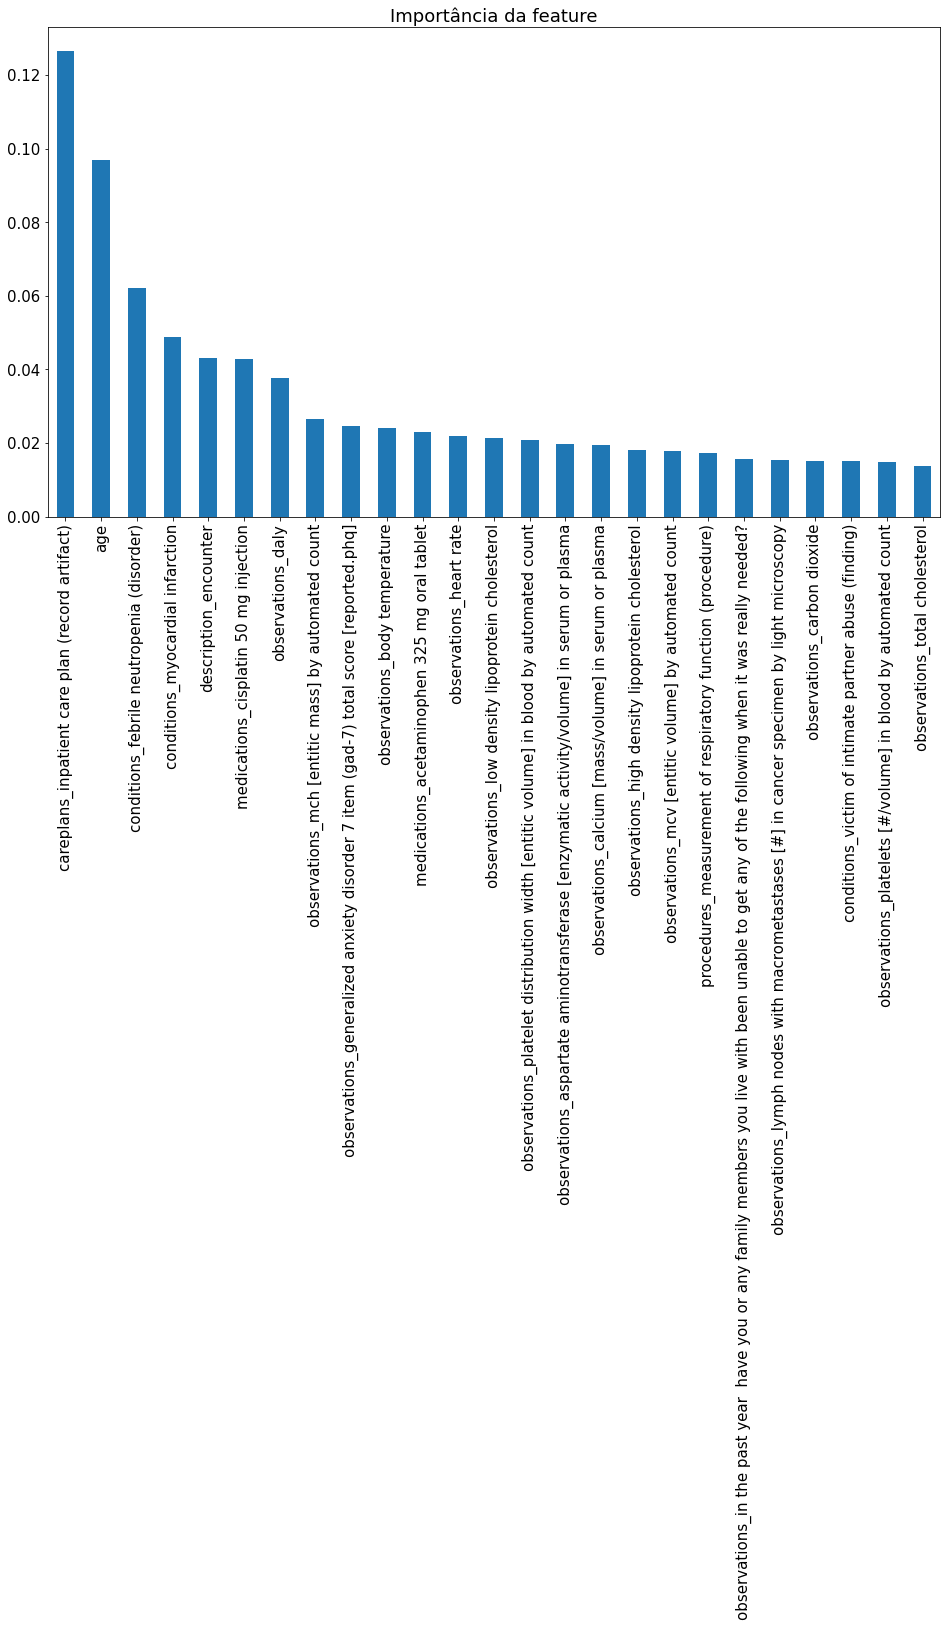

In [ ]:
plt.figure(figsize=(16, 9))
plt.rcParams.update({'font.size': 15})

pd.Series(clf_slim.feature_importances_, index=x_train_slim.columns).sort_values(ascending=False).head(25).plot.bar()
plt.title('Importância da feature')
plt.show()

As 5 colunas consideradas mais importante pelo modelo foram uma associada ao plano de saúde do paciente internado, seguida da idade, condição de neutropenia febril, condição de histórico de infarto do miocardio e medicamento injeção cisplatin, associada ao tratamento de sintomas de alguns tipos de cancer.

In [ ]:
from sklearn import tree
import graphviz

dot_data = tree.export_graphviz(
    clf, 
    out_file=None, 
    feature_names=x_train.columns,  
    class_names=labels,
    filled=True
)

graph = graphviz.Source(dot_data, format="pdf")

Podemos também aproveitar da estrutura da Arvore de Decisão e visualizar sua estrutura.

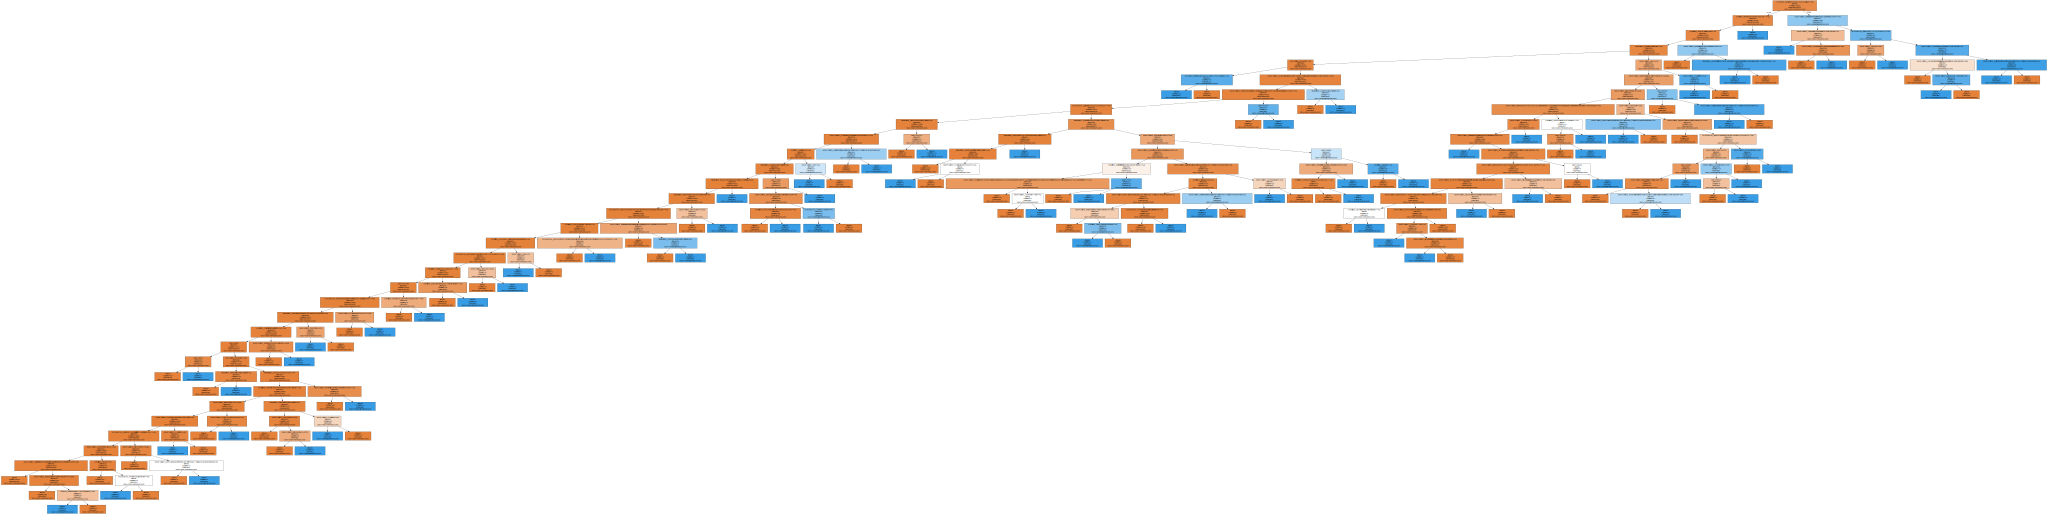

In [ ]:
# graph.render('decision-tree')
graph

#### Treino e Teste em diferentes cenários

Agora iremos avaliar se o aprendizado do modelo em um cenário pode ser aplicado para outro. O cenário 1 apresenta dados do estado de Massachusetts, enquanto o cenário 2 apresenta dados do estado do Alaska.

In [ ]:
train_scenario_1 = encounter_patients[encounter_patients['scenario'] == 1].copy()
test_scenario_2 = encounter_patients[encounter_patients['scenario'] == 2].copy()

In [ ]:
encoder_scenario_1 = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=np.nan)

train_scenario_1[str_columns] = encoder_scenario_1.fit_transform(train_scenario_1[str_columns]) + 1
train_scenario_1 = train_scenario_1.fillna(0)
train_scenario_1['death_before_period'] = train_scenario_1['death_before_period'].astype(int)

test_scenario_2[str_columns] = encoder_scenario_1.transform(test_scenario_2[str_columns]) + 1
test_scenario_2 = test_scenario_2.fillna(0)
test_scenario_2['death_before_period'] = test_scenario_2['death_before_period'].astype(int)

In [ ]:
x_train_scenario_1, x_test_scenario_2 = train_scenario_1[selected_features], test_scenario_2[selected_features]
y_train_scenario_1, y_test_scenario_2 = train_scenario_1['death_before_period'], test_scenario_2['death_before_period']

In [ ]:
x_train_scenario_1

,description_encounter,age,conditions_victim of intimate partner abuse (finding),conditions_myocardial infarction,conditions_has a criminal record (finding),conditions_concussion with no loss of consciousness,conditions_bullet wound,conditions_diabetes,conditions_febrile neutropenia (disorder),conditions_sepsis caused by virus (disorder),...,observations_mchc [mass/volume] by automated count,observations_pain severity - 0-10 verbal numeric rating [score] - reported,observations_qaly,observations_how often do you see or talk to people that you care about and feel close to (for example: talking to friends on the phone visiting friends or family going to church or club meetings)?,observations_low density lipoprotein cholesterol,observations_prostate specific ag [mass/volume] in serum or plasma,observations_carbon dioxide total [moles/volume] in serum or plasma,observations_in the past year have you or any family members you live with been unable to get any of the following when it was really needed?,observations_patient health questionnaire 2 item (phq-2) total score [reported],observations_mcv [entitic volume] by automated count
0,8.0,4.087671,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,11.0,4.087671,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,8.0,4.361644,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,10.0,3.090411,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,25.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,18.0
4,14.0,5.000000,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,...,25.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,18.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5541,10.0,8.723288,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,17.0,2.0,489.0,0.0,0.0,0.0,0.0,0.0,0.0,13.0
5542,30.0,63.345205,1.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,...,21.0,5.0,423.0,3.0,751.0,0.0,0.0,4.0,3.0,137.0
5543,30.0,73.260274,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,...,42.0,1.0,503.0,2.0,669.0,0.0,0.0,8.0,1.0,101.0
5544,30.0,52.586301,1.0,0.0,2.0,0.0,0.0,2.0,0.0,0.0,...,15.0,2.0,305.0,1.0,118.0,0.0,0.0,4.0,2.0,36.0


In [ ]:
clf_scenario_1 = DecisionTreeClassifier(random_state=42)
clf_scenario_1.fit(x_train_scenario_1, y_train_scenario_1)

y_pred_scenario_2 = clf_scenario_1.predict(x_test_scenario_2)

                            precision    recall  f1-score   support

      Sobrevive após 1 ano       0.97      0.93      0.95      5366
Vem a óbito antes de 1 ano       0.21      0.42      0.28       252

                  accuracy                           0.91      5618
                 macro avg       0.59      0.67      0.62      5618
              weighted avg       0.94      0.91      0.92      5618



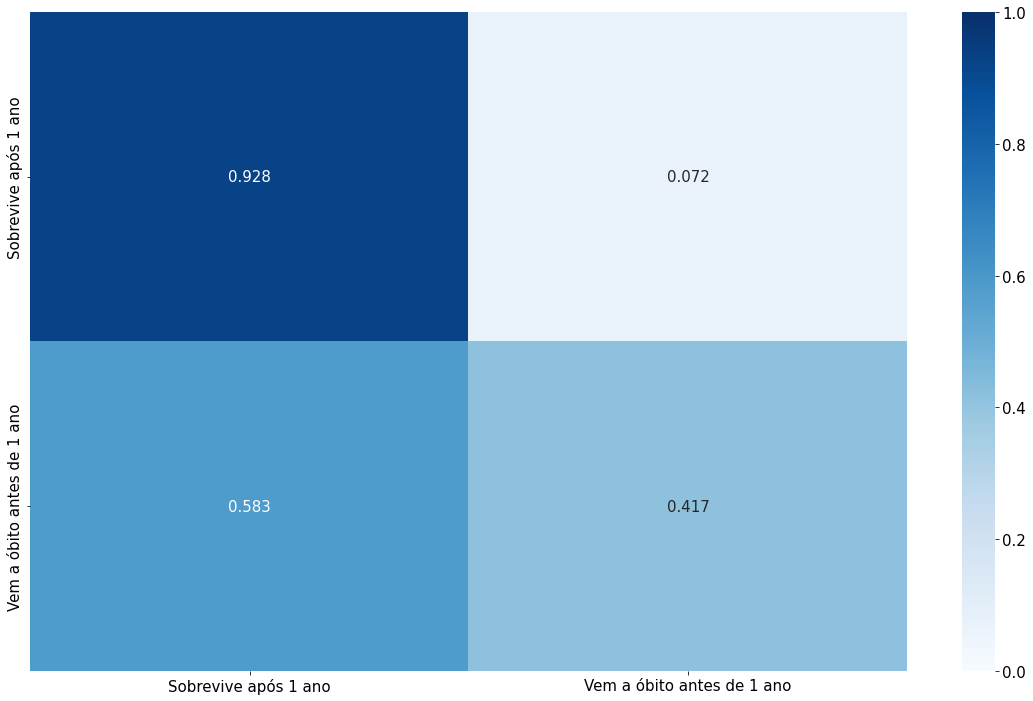

In [ ]:
labels = ['Sobrevive após 1 ano', 'Vem a óbito antes de 1 ano']
print(classification_report(y_test_scenario_2, y_pred_scenario_2, target_names=labels))

pĺot_confusion_matrix(y_test_scenario_2, y_pred_scenario_2)

## Conclusão

O modelo de prognóstico treinado obteu uma acurácia de $97\%$. No entanto, este é um problema que possui um grande desbalanceamento de classes. No conjunto de testes, apenas $6\%$ das classes pertencem ao grupo de pacientes que não sobrevivem até 1 ano. Assim, as métricas de precisão, revocação e f1 são mais importantes para avaliar o desempenho do modelo.

Nestas métricas, o modelo atinge $0.71$ na precisão, $0.78$ na revocação e $0.75$ no f1. Estas métricas mostram que o modelo conseguiu aprender as caracteristicas do conjunto de treino e usou este aprendizado no conjunto de treino de forma satisfatória, mas com boa margem para melhoria.

Vemos pelas métricas apresentadas que ao treinar o modelo apenas no cenário 1, o seu aprendizado não foi transferido ao aplicar no cenário 2. Teorizamos que isso se dá devido a diferenças econômicas, demográficas e geográficas entre pacientes nos dois cenarios. Podemos observar também que a feature mais importante foi a de planos de saúde, o que faz sentido, uma vez que as duas cidades analisadas localizam-se nos EUA, onde não há um sistema de saúde público como o SUS, portanto a quantidade de dinheiro que um indivíduo investiu em planos de saúde é uma variável importate no contexto desse projeto.

A principal difuculdade desse projeto foi conseguir unir todos os conjuntos de dados (alergia, plano de saúde, etc) em um único dataset, de modo que cada feature representasse uma coluna e cada valor fosse associado ao seu respectivo ID.

Como melhoria podemos implementar diferentes técnicas de aprendizagem de máquina (random forest, KNN, regressão logística) e avaliar qual delas teve melhor desempenho. Além disso, dispondo de mais tempo para a enterega do projeto, podemos implementar uma análise exploratória mais robusta a fim de compreender melhor a distribuição dos dados e identificar possíveis outliers.